## Загрузка данных
#### Данные беру из Churn_modeling.zip

# Colab

https://drive.google.com/file/d/1ilb0iIuToOiuFSQpfWQvTCG4jl8I6hOx/view?usp=sharing

In [1]:
! gdown --id 1ilb0iIuToOiuFSQpfWQvTCG4jl8I6hOx

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


! unzip /content/churn_modeling.zip -d /content/churn_modeling/

In [9]:
! unzip /content/churn_modeling.zip -d /content/churn_modeling/

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [1]:
import pandas as pd

In [8]:
df = pd.read_csv('/content/churn_modeling/Churn_Modelling.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/churn_modeling/Churn_Modelling.csv'

In [ ]:
df.head()

# Pycharm

In [4]:
from zipfile import ZipFile

with ZipFile('churn_modeling.zip', 'r') as zf:
    zf.extractall()

In [2]:
'---------------------------------------------'

'---------------------------------------------'

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Анализ данных (быстрый)

In [4]:
df.shape

(10000, 14)

In [5]:
df.isna().mean()

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df.Exited.value_counts(normalize=True)  # value counts в процентах
# 20% клиентов ушли

0    0.7963
1    0.2037
Name: Exited, dtype: float64

## Обучающая, валидационная и тестовая выборки

In [9]:
from sklearn.model_selection import  train_test_split

Будем использовать стратификацию, для более ровной разбивки данных, т.к. маленькая выборка

In [10]:
train, test = train_test_split(df, random_state=42, train_size=0.6, stratify=df.Exited)

In [11]:
val, test = train_test_split(test, random_state=42, train_size=0.5, stratify=test.Exited)

проверка разбивки

In [12]:
val.Exited.mean(), test.Exited.mean(), train.Exited.mean()

(0.204, 0.2035, 0.20366666666666666)

## Phik

С помощью Phik отберём наиболее важные переменные (по мнению Phik), тем самым сократить работу по анализу
Для человеческого обучения val не нужна, по этому можно обучиться на полном трейне

In [13]:
train_full = pd.concat([train, val])

In [14]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6851,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0
7026,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0
5705,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0
9058,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0
9415,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0


In [15]:
train_full.shape

(8000, 14)

In [16]:
import phik

In [17]:
phik_overview = train_full.phik_matrix()

interval columns not set, guessing: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


C:\Users\Zetis\AppData\Local\Programs\Python\Python310\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable Surname is large: 2591. Are you sure this is not an interval variable? Analysis for pairs of variables including Surname can be slow.
  warnings.warn(


Отсортированные переменные по влиянию на модель, по мнению Phik
Для Human learning можно взять 3 самых важных признака исключая целевой (target = Exited)

In [18]:
phik_overview.Exited.sort_values(ascending=False)

Exited             1.000000
NumOfProducts      0.564969
Age                0.498768
IsActiveMember     0.237244
Balance            0.167823
Gender             0.165231
CreditScore        0.105371
Geography          0.104047
CustomerId         0.035477
Tenure             0.030333
RowNumber          0.000000
Surname            0.000000
HasCrCard          0.000000
EstimatedSalary    0.000000
Name: Exited, dtype: float64

## Human learning

Левая колонка - кол-во продуктов у клиента, центральная - к-во клиентов, правая - Score, то есть оценка склонности (вероятность) клиента к чему либо
Если у клиента - 1 продукт, то он склонен к оттоку (27.5%)
Если у клиента - 2 продукта, то он менее склонен к оттоку (7.7%)
Если у клиента - 3 продукта, то он сильно склонен к оттоку (82.6%)

##### ! Score НЕ всегда равен вероятности !

In [19]:
train_full.groupby('NumOfProducts').Exited.agg(['count', 'mean'])

,count,mean
NumOfProducts,,
1,4060,0.275369
2,3673,0.077049
3,219,0.826484
4,48,1.000000


In [20]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6851,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0
7026,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0
5705,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0
9058,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0
9415,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0


In [21]:
model = train_full.groupby('NumOfProducts').Exited.mean().reset_index()

In [22]:
model.head()

,NumOfProducts,Exited
0,1,0.275369
1,2,0.077049
2,3,0.826484
3,4,1.000000


In [23]:
model = model.rename({'Exited': 'score_prod'}, axis=1)

In [24]:
model.head()

,NumOfProducts,score_prod
0,1,0.275369
1,2,0.077049
2,3,0.826484
3,4,1.000000


Приджойним даблицу к фул трейн

In [25]:
train_full = train_full.merge(model, how='left', on='NumOfProducts')

In [26]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049


На фул трейне получим те же цифры, т.к. мы на них и обучались

In [27]:
train_full.groupby('score_prod').Exited.agg(['count', 'mean'])

,count,mean
score_prod,,
0.077049,3673,0.077049
0.275369,4060,0.275369
0.826484,219,0.826484
1.000000,48,1.000000


Для того, чтобы выбрать 0 или 1 в target из scor`a нужно придумать (выбрать) какое нибудь отсечение

## Baseline

Для бейзлайна возьмём среднее
Это будет доля клиентов, которые оттекли

Вероятность того, что клиент оттечёт 20.3% по всей выборке

In [28]:
train_full['score_mean'] = train_full.Exited.mean()

In [29]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049,0.20375
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049,0.20375
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049,0.20375
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369,0.20375
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049,0.20375


Метрика log loss не интерпретируется, по этому данная метрика редко используется для анализа моделей, чаще используется для оптимизации (поиска минимума функции ошибки)

In [30]:
from sklearn.metrics import log_loss

посчитаем логлос на основе средней ошибки

In [31]:
log_loss(train_full.Exited, train_full.score_mean)

0.5055572860042145

In [32]:
log_loss(train_full.Exited, train_full.score_prod)

0.4359616823203511

Ошибка score prod меньше и лучше чем baseline

## Uplift

In [33]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049,0.20375
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049,0.20375
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049,0.20375
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369,0.20375
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049,0.20375


Средний отток во всей выборке ≈20%

In [34]:
train_full.Exited.mean()

0.20375

Средний отток по случайным 10% от выборки

In [35]:
train_full.Exited.sample(frac=0.1, random_state=42).mean()

0.20625

Средний ототок по 20%, 30%, 50% выборки

Средний отток по случайной подвыборке будет всегда +- 20% т.к. во всей выборке средний отток 20%

In [36]:
train_full.Exited.sample(frac=0.2, random_state=42).mean(), train_full.Exited.sample(frac=0.3, random_state=42).mean(), train_full.Exited.sample(frac=0.5, random_state=42).mean()

(0.210625, 0.20333333333333334, 0.20675)

всего в выборке отточных клиентов:

In [37]:
exited_all = train_full.Exited.sum()

In [38]:
exited_all

1630

Можно замерить какой процент оттока будет в каждой подвыборке.
Получается что в 20% случайной подвыборке 337 отточных пользователей

In [39]:
train_full.Exited.sample(frac=0.2, random_state=42).sum()

337

Если взять 20% выборки и поделить на количество отточных пользователей в ней, то получится тоже 20%

In [40]:
train_full.Exited.sample(frac=0.2, random_state=42).sum() / exited_all

0.2067484662576687

##### !!! Доля отточников при случайной сортировке пропорциональна размеру выборки !!!
такая сортировка не даёт никакого профита

Отсортируем клиентов по scor`у

In [41]:
train_full = train_full.sort_values('score_prod', ascending=False)

Возьмём 20% из всей выборки

In [42]:
round(len(train_full) * 0.2)

1600

Суммарное количество отточников в верхних 20%

In [43]:
train_full.head(round(len(train_full) * 0.2)).Exited.sum()

583

Процент отточников в верхних 20% выборки - выше 35% провтив 20% в случайной подвыборке

In [44]:
train_full.head(round(len(train_full) * 0.2)).Exited.sum() / exited_all

0.3576687116564417

Посчитаем Uplift: ≈35% / ≈20%
Получается, что данный uplift лучше чем рандом в 1.75 раз

In [45]:
(train_full.head(round(len(train_full) * 0.2)).Exited.sum() / exited_all) / (train_full.Exited.sample(frac=0.2, random_state=42).sum() / exited_all)

1.7560240963855422

## Добавим шум

In [46]:
import numpy as np

In [47]:
np.random.seed(42)  # Фиксируем случайность
np.random.uniform(0, 0.001, size=len(train_full))  # распределение шума от 0 до 0.001

array([0.00037454, 0.00095071, 0.00073199, ..., 0.00045533, 0.00090844,
       0.00010448])

В скоре прод - 4 уникальных значения

In [48]:
train_full.score_prod.nunique()

4

Внесём шум в данные

In [49]:
np.random.seed(42)
train_full['score_prod'] = train_full['score_prod'] - np.random.uniform(0, 0.001, size=len(train_full))

In [50]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean
6946,6876,15665283,Brookes,610,France,Female,57,7,72092.95,4,0,1,113228.82,1,0.999625,0.20375
1245,3153,15724161,Sutton,644,France,Female,40,9,137285.26,4,1,0,77063.63,1,0.999049,0.20375
7056,2542,15679770,Smith,611,France,Female,61,3,131583.59,4,0,1,66238.23,1,0.999268,0.20375
7847,1702,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1,0.999401,0.20375
693,7568,15750545,Chidiebere,629,France,Male,44,5,0.00,4,0,0,117572.59,1,0.999844,0.20375


Теперь в скоре прод ВСЕ значения - искусственно уникальные

In [51]:
train_full.score_prod.nunique()

8000

## Функция для uplift

In [53]:
def uplift(df, score, pct):
    exited_all = df.Exited.sum()
    df = df.sort_values(score, ascending=False)
    exited_found = df.head(round(len(df) * pct)).Exited.sum()
    return (exited_found / exited_all) / pct

In [54]:
uplift(train_full, 'score_prod', 0.2)

1.9079754601226995

Проверим Uplift, на уже известных значениях

In [65]:
exited_all = train_full.Exited.sum()

In [71]:
train_full = train_full.sort_values('score_prod', ascending=False)

In [74]:
train_full.head(round(len(train_full) * 0.2)).Exited.sum() / exited_all

0.3815950920245399

In [76]:
train_full.head(round(len(train_full) * 0.2)).Exited.sum() / exited_all / 0.2

1.9079754601226995

Проверим Uplift для теста

In [79]:
test = test.merge(model, on='NumOfProducts', how='left')

In [81]:
test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.275369
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.275369
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.275369
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.275369
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275369


Добавим шум в тест
При добавлении шума обязательно указывать random seed, для сопоставления результатов

In [92]:
np.random.seed(42)
test['score_prod'] = test['score_prod'] - np.random.uniform(0, 0.001, size=len(test))

In [93]:
test.score_prod.nunique()

2000

In [94]:
test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274991
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274418
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274165
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274742
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.274239


Посчитаем logloss для трейна и теста

In [95]:
log_loss(train_full.Exited, train_full.score_prod)

0.4359717821616623

In [96]:
log_loss(test.Exited, test.score_prod)

0.43387748203155946

Посчитаем Uplift

In [97]:
uplift(train_full, 'score_prod', 0.2)

1.9079754601226995

In [98]:
uplift(test, 'score_prod', 0.2)

1.8427518427518426

## Добавим возраст
т.к. это следующая по значимости переменная по версии Phik

In [100]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.style.use('seaborn-v0_8-colorblind')

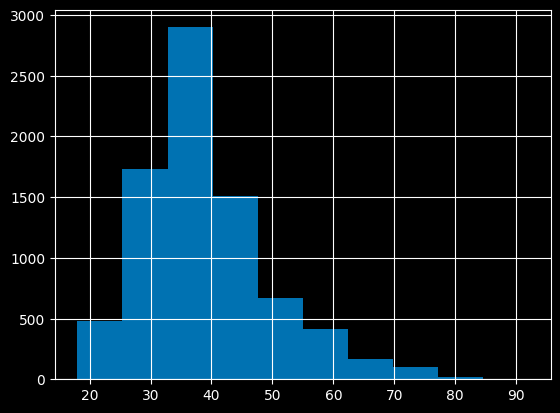

In [101]:
train_full.Age.hist();

Создадим интервалы для груп по возрасту

In [102]:
train_full['age_group'] = pd.qcut(train_full.Age, 5)

In [103]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean,age_group
257,4512,15568006,Ukaegbunam,634,France,Female,45,2,0.00,4,1,0,101039.53,1,0.999979,0.20375,"(40.0, 46.0]"
3036,4655,15593976,Swanson,578,Germany,Female,31,5,102088.68,4,0,0,187866.21,1,0.999966,0.20375,"(17.999, 31.0]"
4054,4404,15616859,Bonwick,602,Germany,Female,43,2,113641.49,4,1,0,115116.35,1,0.999954,0.20375,"(40.0, 46.0]"
3202,9412,15796115,Forbes,689,Germany,Female,40,4,78119.59,4,1,0,119259.34,1,0.999942,0.20375,"(35.0, 40.0]"
1874,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0.999935,0.20375,"(17.999, 31.0]"


Чем старше клиент, тем больше вероятность того, что он уйдёт

In [106]:
train_full.groupby('age_group').Exited.agg(['count', 'mean'])

,count,mean
age_group,,
"(17.999, 31.0]",1896,0.075422
"(31.0, 35.0]",1424,0.091994
"(35.0, 40.0]",1797,0.146912
"(40.0, 46.0]",1376,0.289971
"(46.0, 92.0]",1507,0.459854


Нельзя применять qcut для другой выборки (тестовой) т.к. она может разделиться по другому. ПО этому будем использовать cut

In [110]:
train_full['age_group'] = pd.cut(train_full.Age, [0, 31, 35, 40, 46, float('inf')])

In [111]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean,age_group
257,4512,15568006,Ukaegbunam,634,France,Female,45,2,0.00,4,1,0,101039.53,1,0.999979,0.20375,"(40.0, 46.0]"
3036,4655,15593976,Swanson,578,Germany,Female,31,5,102088.68,4,0,0,187866.21,1,0.999966,0.20375,"(0.0, 31.0]"
4054,4404,15616859,Bonwick,602,Germany,Female,43,2,113641.49,4,1,0,115116.35,1,0.999954,0.20375,"(40.0, 46.0]"
3202,9412,15796115,Forbes,689,Germany,Female,40,4,78119.59,4,1,0,119259.34,1,0.999942,0.20375,"(35.0, 40.0]"
1874,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0.999935,0.20375,"(0.0, 31.0]"


In [112]:
train_full.groupby('age_group').Exited.agg(['count', 'mean'])

,count,mean
age_group,,
"(0.0, 31.0]",1896,0.075422
"(31.0, 35.0]",1424,0.091994
"(35.0, 40.0]",1797,0.146912
"(40.0, 46.0]",1376,0.289971
"(46.0, inf]",1507,0.459854


помимо num of products добавим в модель age groups

In [114]:
model = train_full.groupby(['NumOfProducts', 'age_group']).Exited.mean().reset_index()

In [115]:
model = model.rename({'Exited': 'score_prod_age'}, axis=1)

In [116]:
model.head()

,NumOfProducts,age_group,score_prod_age
0,1,"(0.0, 31.0]",0.106774
1,1,"(31.0, 35.0]",0.135908
2,1,"(35.0, 40.0]",0.198646
3,1,"(40.0, 46.0]",0.378873
4,1,"(46.0, inf]",0.542506


In [118]:
train_full = train_full.merge(model, how='left', on=['NumOfProducts', 'age_group'])

In [119]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean,age_group,score_prod_age
0,4512,15568006,Ukaegbunam,634,France,Female,45,2,0.00,4,1,0,101039.53,1,0.999979,0.20375,"(40.0, 46.0]",1.0
1,4655,15593976,Swanson,578,Germany,Female,31,5,102088.68,4,0,0,187866.21,1,0.999966,0.20375,"(0.0, 31.0]",1.0
2,4404,15616859,Bonwick,602,Germany,Female,43,2,113641.49,4,1,0,115116.35,1,0.999954,0.20375,"(40.0, 46.0]",1.0
3,9412,15796115,Forbes,689,Germany,Female,40,4,78119.59,4,1,0,119259.34,1,0.999942,0.20375,"(35.0, 40.0]",1.0
4,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0.999935,0.20375,"(0.0, 31.0]",1.0


Сравним метрики loglos
предыдущие метрики:

In [125]:
log_loss(train_full.Exited, train_full.score_prod)

0.4359717821616623

In [126]:
uplift(train_full, 'score_prod', 0.2)

1.9079754601226995

Новые метрики:
На первых 20% uplift лучше в 2.7 раз чем рандом

In [128]:
log_loss(train_full.Exited, train_full.score_prod_age)

0.3866695862492173

In [129]:
uplift(train_full, 'score_prod_age', 0.2)

2.702453987730061

Посчитаем эти же показатели для теста:

In [130]:
test['age_group'] = pd.cut(test.Age, [0, 31, 35, 40, 46, float('inf')])

In [131]:
test = test.merge(model, how='left', on=['NumOfProducts', 'age_group'])

In [132]:
log_loss(test.Exited, test.score_prod_age)

0.3870707514157596

In [133]:
uplift(test, 'score_prod_age', 0.2)

2.7518427518427515